## Feature Selection
    1. Filter Methods
         Basic
             Constant Features
             Quasi-Constant Features
             Duplicated Features
         Correlation
         
    2. Embedded Methods
           Lasso Regularization
           Linear Models
           Trees

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
df = pd.read_csv('../DataSets/santander.csv', nrows=50000)
df.shape

(50000, 371)

In [5]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
target_name = 'TARGET'

# Separate object for target feature
y = df[target_name]

# Separate Object for Input Features
X = df.drop(target_name, axis=1)
X = X.drop('ID', axis=1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [9]:
X_train.shape, X_test.shape

((35000, 369), (15000, 369))

In [10]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [11]:
X_train_original.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
24515,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109642.23
21369,2,40,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45812.58
7912,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57278.25
40811,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56913.54
34910,2,46,0.0,788.79,2219.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4548613.92


### Remove constant & quasi-constant features

In [12]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
# remove quasi-constant features
sel = VarianceThreshold(
    threshold=0.01)  # 0.01 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

266

In [22]:
features_to_keep = X_train.columns[sel.get_support()]

In [17]:
features_to_keep

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=326)

In [19]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

ValueError: X has a different shape than during fitting.

In [20]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

### Remove duplicated features

In [23]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

28

In [24]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 298), (15000, 298))

In [26]:
X_train_basic = X_train.copy()
X_test_basic = X_test.copy()

In [27]:
X_train.shape

(35000, 298)

### Remove correlated features

In [28]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  173


In [30]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 125), (15000, 125))

In [31]:
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [32]:
X_train.shape

(35000, 125)

### Remove features using univariate ROC-AUC

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [34]:
# find important features using univariate roc-auc

# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

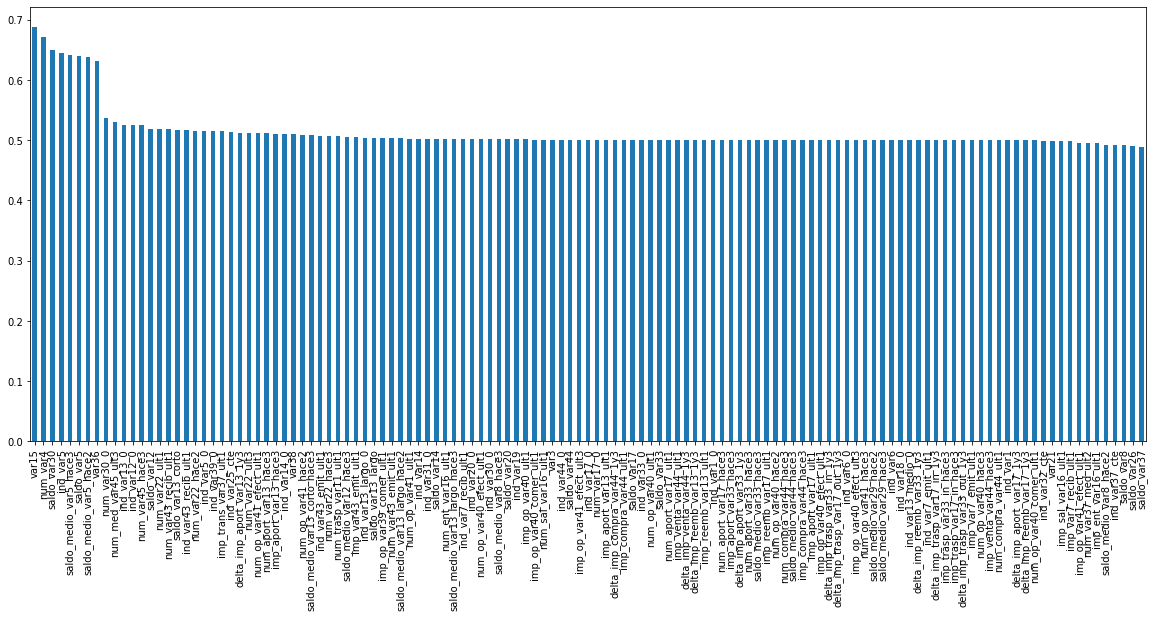

In [35]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [41]:
# by removing features with univariate roc_auc == 0.5
# we remove another 30 features

selected_feat = roc_values[roc_values>0.5]

(94, (35000, 125))

In [43]:
len(selected_feat)

94

In [44]:
X_train.shape

(35000, 125)

In [45]:
X_train_univariate_rocauc = X_train[selected_feat.index]
X_test_univariate_rocauc = X_test[selected_feat.index]

In [47]:
X_train_univariate_rocauc.shape

(35000, 94)

### Remove features using Lasso

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
# fit a lasso and selet features, make sure to select l1
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train), y_train)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [51]:
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_lasso = pd.DataFrame(sel_.transform(X_train))
X_test_lasso = pd.DataFrame(sel_.transform(X_test))

# add the columns name
X_train_lasso.columns = X_train.columns[(sel_.get_support())]
X_test_lasso.columns = X_train.columns[(sel_.get_support())]

In [52]:
X_train_lasso.shape, X_test_lasso.shape

((35000, 91), (15000, 91))

In [98]:
X_train_lasso.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var40_comer_ult1', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       'imp_op_var41_efect_ult1', 'imp_sal_var16_ult1', 'ind_var1_0',
       'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6',
       'ind_var12_0', 'ind_var13_0', 'ind_var13_largo_0', 'ind_var13_medio_0',
       'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var19', 'ind_var20_0',
       'ind_var25_cte', 'ind_var30_0', 'ind_var32_cte', 'ind_var33_0',
       'ind_var37_cte', 'ind_var39_0', 'ind_var44_0', 'num_var4',
       'num_var17_0', 'num_op_var40_hace2', 'num_op_var40_ult1',
       'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1',
       'num_var30_0', 'num_var37_med_ult2', 'saldo_var5', 'saldo_var8',
       'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var14',
       'saldo_var26', 'saldo_var37', 'var36', 'delta_imp_aport_var13_1y3',
       'delta

### Select features by the regression coefficients

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
# select features using the coefficient of a non
# regularised logistic regression

sel_ = SelectFromModel(LogisticRegression(C=1000))
sel_.fit(scaler.transform(X_train), y_train)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1000, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [58]:
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_coef = pd.DataFrame(sel_.transform(X_train))
X_test_coef = pd.DataFrame(sel_.transform(X_test))

In [59]:
# add the columns name
X_train_coef.columns = X_train.columns[(sel_.get_support())]
X_test_coef.columns = X_train.columns[(sel_.get_support())]

In [60]:
X_train_coef.shape, X_test_coef.shape

((35000, 33), (15000, 33))

### Select features by random forests derived importance

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [62]:
# select features using the importance derived from
# random forests

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=400))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=400, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [63]:
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_rf = pd.DataFrame(sel_.transform(X_train))
X_test_rf = pd.DataFrame(sel_.transform(X_test))

In [64]:
# add the columns name
X_train_rf.columns = X_train.columns[(sel_.get_support())]
X_test_rf.columns = X_train.columns[(sel_.get_support())]

In [65]:
X_train_rf.shape, X_test_rf.shape

((35000, 18), (15000, 18))

## Evaluate Performance

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [69]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

### Original

In [70]:
# original
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Random Forests roc-auc: 0.7723262006823631


### Basic

In [71]:
run_randomForests(X_train_basic,X_test_basic,y_train, y_test)

Random Forests roc-auc: 0.7670330234672305


### Correlated

In [72]:
run_randomForests(X_train_corr, X_test_corr,y_train, y_test)

Random Forests roc-auc: 0.7793285895676648


### Univariate - ROC-AUC

In [73]:
run_randomForests(X_train_univariate_rocauc,
                  X_test_univariate_rocauc,
                  y_train, y_test)

Random Forests roc-auc: 0.7752497942604848


### Embedded - Lasso

In [74]:
run_randomForests(X_train_lasso, X_test_lasso,y_train, y_test)

Random Forests roc-auc: 0.7759198460411126


### Regression - Coefficients

In [75]:
run_randomForests(X_train_coef, X_test_coef,y_train, y_test)

Random Forests roc-auc: 0.7831641723081046


### Random Forest - Derived Importance

In [76]:
run_randomForests(X_train_rf, X_test_rf,y_train, y_test)

Random Forests roc-auc: 0.798644281218182


## Logistic Regression

In [77]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

### Original

In [80]:
# original
scaler.fit(X_train_original)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
X_train_scaler = scaler.transform(X_train_original)
X_test_scaler = scaler.transform(X_test_original)

In [82]:
run_logistic(X_train_scaler,X_test_scaler, y_train, y_test)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression roc-auc: 0.7760043560321295


### Basic

In [83]:
# original
scaler.fit(X_train_basic)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
X_train_basic_scaler = scaler.transform(X_train_basic)
X_test_basic_scaler = scaler.transform(X_test_basic)

In [85]:
run_logistic(X_train_basic_scaler,X_test_basic_scaler, y_train, y_test)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression roc-auc: 0.7759635501105411


### Correlated Dataset

In [86]:
# filter methods - basic
scaler.fit(X_train_corr)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [87]:
X_train_corr_scaler = scaler.transform(X_train_corr)
X_test_corr_scaler = scaler.transform(X_test_corr)

In [88]:
run_logistic(X_train_corr_scaler, X_test_corr_scaler, y_train, y_test)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression roc-auc: 0.7770694833263179


### Univariate - ROC-AUC

In [89]:
# filter methods - basic
scaler.fit(X_train_univariate_rocauc)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
X_train_univariate_rocauc_scaler = scaler.transform(X_train_univariate_rocauc)
X_test_univariate_rocauc_scaler = scaler.transform(X_test_univariate_rocauc)

In [91]:
run_logistic(X_train_univariate_rocauc_scaler, X_test_univariate_rocauc_scaler, y_train, y_test)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression roc-auc: 0.7784171220719578


### Embedded - Lasso

In [92]:
# filter methods - basic
scaler.fit(X_train_lasso)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
X_train_lasso_scaler = scaler.transform(X_train_lasso)
X_test_lasso_scaler = scaler.transform(X_test_lasso)

In [94]:
run_logistic(X_train_lasso_scaler, X_test_lasso_scaler, y_train, y_test)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression roc-auc: 0.7771160855435865


### Regression - Coefficients

In [95]:
run_logistic(X_train_coef, X_test_coef,y_train, y_test)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression roc-auc: 0.5906223007375554


C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Random Forest - Derived Importance

In [96]:
run_logistic(X_train_rf, X_test_rf,y_train, y_test)

C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression roc-auc: 0.5782005492801638


C:\Users\pdamo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
